In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%mkdir -p ../ressources/final_experiments/automode_datasets

In [3]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [4]:
from pathlib import Path
datasets = [
    #"automode_evaluated_seed14_n600.pickle", # the first two datasets seem to have a different score distribution (probably different fitness function) and do not make sense to compare with others
    #"automode_evaluated_seed15_n600.pickle",
    "automode_evaluated_seed16_n300_24-12-17_targetlights.pickle",
    "automode_evaluated_seed17_n600_24-12-20.pickle",
    "automode_evaluated_seed18_n600_24-12-23.pickle",
    "automode_evaluated_seed19_n600_24-12-24.pickle",
    "automode_evaluated_seed20_n600_25-01-16.pickle"
]

dataset_dir = Path("../ressources")

datasets = [dataset_dir / d for d in datasets]
datasets = [pd.read_pickle(d) for d in datasets]
combined_df = pd.concat(datasets, axis=0, ignore_index=True)
combined_df

,description,configuration,parameters,argos,behavior_tree,scores,avg_score
0,The environment is a rectangular area with len...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.6, 0.8, 0.4, 0.8, 0.6, 0.4, 0.8, 0.6, 0.8, ...",0.640000
1,A circle with 14 walls forms the structure of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, ...",0.980000
2,The area is a rectangle with dimensions 3.01 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[-15.4044, -12.5675, -18.7304, -14.262, -9.990...",-14.494733
3,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[2.0, 0.0, 4.0, 5.0, 2.0, 2.0, 2.0, 3.0, 4.0, ...",2.900000
4,"The circular arena, constructed with 3 walls, ...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[-2.17621, -1.86975, -2.05369, -2.09637, -2.11...",-2.048390
...,...,...,...,...,...,...,...
2695,"The rectangular space is 7.11 m long, 6.27 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.304348, 0.304348, 0.434783, 0.434783, 0.608...",0.391305
2696,The area is a rectangle with dimensions 7.27 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.4, 0.36, 0.36, 0.4, 0.36, 0.28, 0.24, 0.36,...",0.332000
2697,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.904762, 0.666667, 0.714286, 0.666667, 0.761...",0.719048
2698,A circle with 24 walls forms the structure of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[-2.05816, -3.13608, -2.5613, -1.05903, -2.234...",-2.468775


In [5]:
combined_df["type"] = combined_df["parameters"].map(lambda x: type(x.objective_params).__name__)
combined_df["lightstype"] = combined_df["parameters"].map(lambda x: type(x.lights_params).__name__)
combined_df["arenatype"] = combined_df["parameters"].map(lambda x: type(x.arena_params).__name__)
combined_df["robotstype"] = combined_df["parameters"].map(lambda x: type(x.robots_params).__name__)
combined_df.type.unique(), combined_df.lightstype.unique(), combined_df.arenatype.unique(), combined_df.robotstype.unique()

(array(['Aggregation', 'Connection', 'Foraging', 'Distribution'],
       dtype=object),
 array(['TargetLights', 'UniformLights'], dtype=object),
 array(['RectangularArena', 'CircularArena'], dtype=object),
 array(['CenteredSwarm'], dtype=object))

In [6]:
num_rows_by_lightstype = combined_df.groupby("lightstype").size()
num_rows_by_lightstype

lightstype
TargetLights     1366
UniformLights    1334
dtype: int64

In [7]:
num_scores_by_lightstype = combined_df.groupby("lightstype")["scores"].count()
num_scores_by_lightstype

lightstype
TargetLights     1276
UniformLights    1305
Name: scores, dtype: int64

In [8]:
num_scores_by_lightstype / num_rows_by_lightstype

lightstype
TargetLights     0.934114
UniformLights    0.978261
dtype: float64

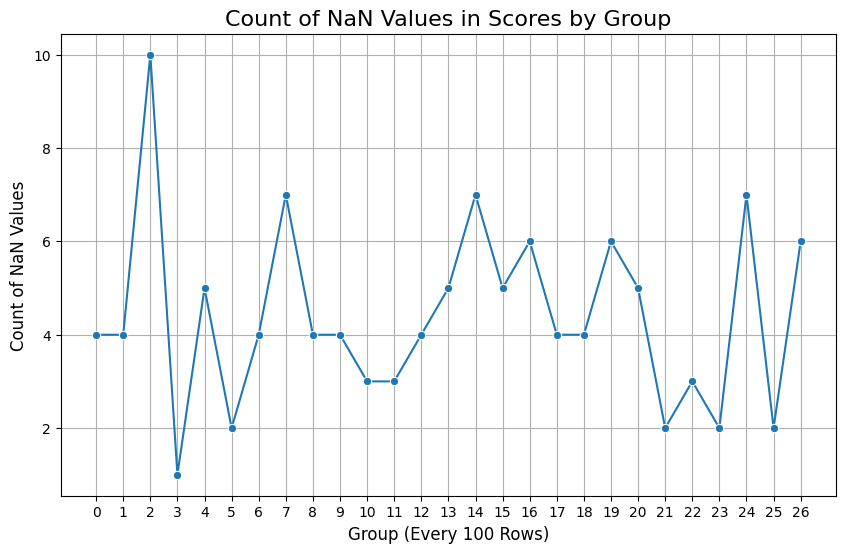

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(combined_df)


# Create a new column to group by every 100 rows
df['group'] = df.index // 100

# Count NaNs in the 'scores' column for each group
nan_counts = df.groupby('group')['scores'].apply(lambda x: x.isna().sum()).reset_index()

# Rename the columns for clarity
nan_counts.rename(columns={'scores': 'nan_count'}, inplace=True)

# Plot the NaN count as a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=nan_counts, x='group', y='nan_count', marker='o')

# Set titles and labels
plt.title('Count of NaN Values in Scores by Group', fontsize=16)
plt.xlabel('Group (Every 100 Rows)', fontsize=12)
plt.ylabel('Count of NaN Values', fontsize=12)
plt.xticks(nan_counts['group'])  # Set x-ticks to show all groups
plt.grid()

# Show the plot
plt.show()


## split into subdataframes I want to do experiments on

shuffle dataframe to avoid systimatic errors eventually done at specific times. also remove nan scores

In [10]:
shuffled_df = combined_df.dropna().sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.head()

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,lightstype,arenatype,robotstype
0,The environment is a circular arena with radiu...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[4.0, 2.0, 4.0, 5.0, 3.0, 4.0, 1.0, 3.0, 5.0, ...",3.600000,Foraging,TargetLights,CircularArena,CenteredSwarm
1,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 1 --n0 0 --nchild0 2 --...,"[3.0, 3.0, 4.0, 2.0, 1.0, 2.0, 5.0, 3.0, 4.0, ...",2.900000,Foraging,UniformLights,CircularArena,CenteredSwarm
2,"With a radius of 3.44 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[-8.57746, -4.79552, -7.16427, -9.41532, -6.30...",-7.018138,Connection,UniformLights,CircularArena,CenteredSwarm
3,The arena has a radius of 1.99 m. In this sett...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.8, 0.866667, 0.733333, 0.8, 0.866667, 0.6, ...",0.740000,Aggregation,UniformLights,CircularArena,CenteredSwarm
4,The area is a rectangle with dimensions 5.11 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[3.0, 5.0, 6.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, ...",4.700000,Foraging,TargetLights,RectangularArena,CenteredSwarm


In [11]:
shuffled_df[shuffled_df.type=="Distribution"].avg_score.min(), shuffled_df[shuffled_df.type=="Foraging"].avg_score.max(), shuffled_df[shuffled_df.type=="Connection"].avg_score.min(), shuffled_df[shuffled_df.type=="Aggregation"].avg_score.max()

(np.float64(-77.84778),
 np.float64(68.5),
 np.float64(-69.81863000000001),
 np.float64(1.0))

### big experiment with increasing size

In [12]:

step = 0.1
ranges = list(np.arange(0,1,step))
ranges = [step + v.item() for v in ranges]
ranges

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [13]:
len(shuffled_df)

2564

In [14]:
n_validate = 250

df_validate = shuffled_df.iloc[:n_validate]  # First 250 entries
df_train = shuffled_df.iloc[n_validate:].iloc[:2250]  # Remaining entries

In [15]:
increasing_size_dfs = [df_train.head(int(len(df_train) * range)) for range in ranges]
[len(d) for d in increasing_size_dfs]


[225, 450, 675, 900, 1125, 1350, 1575, 1800, 2025, 2250]

In [16]:
df_validate.to_pickle(f"../ressources/final_experiments/automode_datasets/df_increasing_size_validate.pickle")

for df, size in zip(increasing_size_dfs,[len(d) for d in increasing_size_dfs]):
    df.to_pickle(f"../ressources/final_experiments/automode_datasets/df_increasing_size_{size}.pickle")

### aggregation color split

In [17]:
def shorten_color_string(c):
    if c == "GroundColor.BLACK":
        return "black"
    else:
        return "white"
    
def map_agg_color(obj):
    if obj.objective_params.agg_target == 1:
        return str(obj.objective_params.ground_area_1.color)
    else:
        return str(obj.objective_params.ground_area_2.color)
    
agg_df = shuffled_df[shuffled_df.type == "Aggregation"].copy().reset_index()
agg_colors = agg_df.apply(lambda row: shorten_color_string(map_agg_color(row["parameters"])), axis=1)
agg_df = pd.concat([agg_df,agg_colors], axis=1).rename(columns={0: "target_color"})
agg_df.head()

,index,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,lightstype,arenatype,robotstype,target_color
0,3,The arena has a radius of 1.99 m. In this sett...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.8, 0.866667, 0.733333, 0.8, 0.866667, 0.6, ...",0.7400,Aggregation,UniformLights,CircularArena,CenteredSwarm,black
1,5,The area is a rectangle with dimensions 6.56 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.333333, 0.0833333, 0.166667, 0.0833333, 0.0...",0.1500,Aggregation,UniformLights,RectangularArena,CenteredSwarm,white
2,6,The environment consists of a rectangular area...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.4, 0.6, 0.6, 0.6, 1.0, 1.0, 0.6, 0.6, 0.6, ...",0.6600,Aggregation,UniformLights,RectangularArena,CenteredSwarm,black
3,9,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.0625, 0.125, 0.0625, 0.125, 0.1875, 0.125, ...",0.1125,Aggregation,UniformLights,CircularArena,CenteredSwarm,black
4,13,"The rectangular space is 1.94 m long, 2.32 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0000,Aggregation,UniformLights,RectangularArena,CenteredSwarm,black


In [18]:
white_aggs = agg_df[agg_df.target_color == "white"].reset_index()
black_aggs = agg_df[agg_df.target_color == "black"].reset_index()
len(white_aggs), len(black_aggs)

(349, 320)

In [19]:
white_aggs[:450].to_pickle("../ressources/final_experiments/automode_datasets/df_aggregation_only_white.pickle")
black_aggs[:450].to_pickle("../ressources/final_experiments/automode_datasets/df_aggregation_only_black.pickle")

### guided env split

In [20]:
guided_env_exp_guided = shuffled_df[shuffled_df.lightstype == "TargetLights"].reset_index()
guided_env_exp_nonguided = shuffled_df[shuffled_df.lightstype != "TargetLights"].reset_index()

len(guided_env_exp_guided), len(guided_env_exp_nonguided)

(1261, 1303)

In [21]:
white_aggs[:1250].to_pickle("../ressources/final_experiments/automode_datasets/df_guided_uniform.pickle")
black_aggs[:1250].to_pickle("../ressources/final_experiments/automode_datasets/df_guided_targeted.pickle")

### leave one out (no aggregation)

In [22]:
df_loo_agg = shuffled_df[shuffled_df.type == "Aggregation"].reset_index()
df_loo_no_agg = shuffled_df[shuffled_df.type != "Aggregation"].reset_index()
len(df_loo_agg), len(df_loo_no_agg)

(669, 1895)

In [23]:
df_loo_agg.to_pickle("../ressources/final_experiments/automode_datasets/df_leaveoneout_agg.pickle")
df_loo_agg.to_pickle("../ressources/final_experiments/automode_datasets/df_leaveoneout_noagg.pickle")

### formal descriptions

In [24]:
df_formal = shuffled_df.copy()
df_formal["description"] = df_formal["configuration"]
print(df_formal.iloc[0].description)

<?xml version="1.00" ?>
<config>
  <swarm-elems>
    <entity quantity="14" max_trials="100">
      <e-puck id="epuck">
        <controller config="automode_bt"/>
      </e-puck>
    </entity>
  </swarm-elems>
  <env-elems>
    <light id="light_0" position="0.25,-0.90,0.00" orientation="360,0,0" color="yellow" intensity="11.80" medium="leds"/>
    <light id="light_1" position="-1.05,-1.21,0.00" orientation="360,0,0" color="yellow" intensity="10.78" medium="leds"/>
    <box id="wall_0" size="0.01,0.87,0.10" movable="false">
      <body position="2.98,0.43,0" orientation="8.18,0,0"/>
    </box>
    <box id="wall_1" size="0.01,0.87,0.10" movable="false">
      <body position="2.74,1.25,0" orientation="24.55,0,0"/>
    </box>
    <box id="wall_2" size="0.01,0.87,0.10" movable="false">
      <body position="2.27,1.97,0" orientation="40.91,0,0"/>
    </box>
    <box id="wall_3" size="0.01,0.87,0.10" movable="false">
      <body position="1.63,2.53,0" orientation="57.27,0,0"/>
    </box>
    <

In [25]:
df_formal.to_pickle("../ressources/final_experiments/automode_datasets/df_formal_descriptions.pickle")

todo these splits should always be same size